# Predicting Bike Purchase 
                                                                                            by: Samuel Yaula Dutse

### Introduction

 Welcome to the dataset exploration and analysis of predicting customer bike purchases. 
    This project employs machine learning techniques such as: 
##### Logistic Regression
##### Decision Tree
##### Random Forest, and 
##### K-Nearest Neighbors (KNN) 
to predict whether a customer will purchase a bike based on their demographic and behavioral characteristics. 
    The dataset used in this project includes a variety of features such as marital status, income, education, occupation, and more.The data has been obtained from an Alex the Analyst's GitHub page Excel folder and provides insights into whether a customer is likely to purchase a bike or not.


In [1]:
# Importing necessary libraries or dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading dataset into notebook
data = pd.read_excel(r'C:\Users\SamDutse\Desktop\Curent Work\Excel Project Dataset.xlsx')

In [3]:
# checking the first five rows of the data
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [4]:
#checking the last five rows
data.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
1021,16466,S,F,20000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,32,Yes
1022,19273,M,F,20000,2,Partial College,Manual,Yes,0,0-1 Miles,Europe,63,No
1023,22400,M,M,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes
1024,20942,S,F,20000,0,High School,Manual,No,1,5-10 Miles,Europe,31,No
1025,18484,S,M,80000,2,High School,Skilled Manual,No,2,1-2 Miles,Pacific,50,Yes


In [10]:
# checking the number of rows and column of the data
data.shape

(1026, 13)

In [11]:
# viewing the names of each of the columns
data.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [12]:
#Exploring the columns, non-null count and Data types of each of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1026 non-null   int64 
 1   Marital Status    1026 non-null   object
 2   Gender            1026 non-null   object
 3   Income            1026 non-null   int64 
 4   Children          1026 non-null   int64 
 5   Education         1026 non-null   object
 6   Occupation        1026 non-null   object
 7   Home Owner        1026 non-null   object
 8   Cars              1026 non-null   int64 
 9   Commute Distance  1026 non-null   object
 10  Region            1026 non-null   object
 11  Age               1026 non-null   int64 
 12  Purchased Bike    1026 non-null   object
dtypes: int64(5), object(8)
memory usage: 104.3+ KB


In [13]:
# Viewing the statistical info of the data, including all not just for int or float data type
data.describe(include = "all")

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1026.000000,1026,1026,1026.000000,1026.000000,1026,1026,1026,1026.000000,1026,1026,1026.000000,1026
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,5,3,NaN,2
top,NaN,M,M,NaN,NaN,Bachelors,Professional,Yes,NaN,0-1 Miles,North America,NaN,No
freq,NaN,549,525,NaN,NaN,311,280,697,NaN,378,508,NaN,531
mean,19969.196881,NaN,NaN,56208.576998,1.892788,NaN,NaN,NaN,1.437622,NaN,NaN,44.138402,NaN
std,5332.672942,NaN,NaN,31293.284007,1.626670,NaN,NaN,NaN,1.125538,NaN,NaN,11.349282,NaN
min,11000.000000,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,25.000000,NaN
25%,15304.750000,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,35.000000,NaN
50%,19744.000000,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,43.000000,NaN
75%,24457.750000,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,52.000000,NaN


In [19]:
#checking for null values
data.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [23]:
# checking for sum of duplicates values
data.duplicated().sum()

26

In [24]:
#checking the 26 duplicated columns
duplicated_row = data[data.duplicated()]
duplicated_row

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
1000,13507,M,F,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
1001,19280,M,M,120000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,40,Yes
1002,22173,M,F,30000,3,High School,Skilled Manual,No,2,1-2 Miles,Pacific,54,Yes
1003,12697,S,F,90000,0,Bachelors,Professional,No,4,10+ Miles,Pacific,36,No
1004,11434,M,M,170000,5,Partial College,Professional,Yes,0,0-1 Miles,Europe,55,No
1005,25323,M,M,40000,2,Partial College,Clerical,Yes,1,1-2 Miles,Europe,35,Yes
1006,23542,S,M,60000,1,Partial College,Skilled Manual,No,1,0-1 Miles,Pacific,45,Yes
1007,20870,S,F,10000,2,High School,Manual,Yes,1,0-1 Miles,Europe,38,Yes
1008,23316,S,M,30000,3,Partial College,Clerical,No,2,1-2 Miles,Pacific,59,Yes
1009,12610,M,F,30000,1,Bachelors,Clerical,Yes,0,0-1 Miles,Europe,47,No


In [22]:
# confirming duplicity
data[data["ID"] == 13507]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
5,13507,M,F,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
1000,13507,M,F,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [25]:
#dropping duplicates data
data_no_duplicates = data.drop_duplicates()
data = data_no_duplicates
data.duplicated().sum()

0

<AxesSubplot:xlabel='Income'>

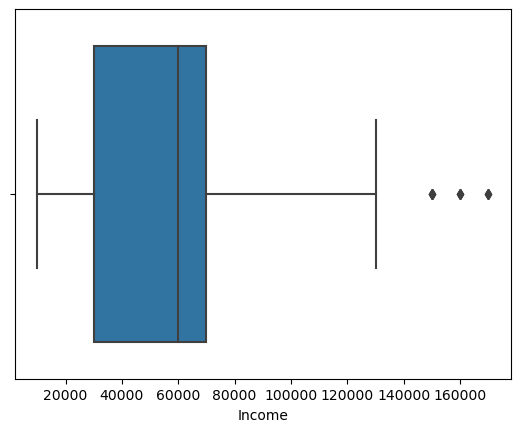

In [27]:
# checking if there are outliers
sns.boxplot(data = data, x = "Income")

In [34]:
#checking the values that are fliers outside the box plot
data[data["Income"] > 140000]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,S,M,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Yes
12,11434,M,M,170000,5,Partial College,Professional,Yes,0,0-1 Miles,Europe,55,No
43,17185,M,F,170000,4,Partial College,Professional,No,3,5-10 Miles,Europe,48,Yes
121,15922,M,M,150000,2,High School,Professional,Yes,4,0-1 Miles,Europe,48,No
178,14191,M,M,160000,4,Partial College,Professional,No,2,10+ Miles,Europe,55,Yes
259,12705,M,M,150000,0,Bachelors,Management,Yes,4,0-1 Miles,Pacific,37,Yes
321,16675,S,F,160000,0,Graduate Degree,Management,No,3,0-1 Miles,Pacific,47,Yes
356,23608,M,F,150000,3,High School,Professional,Yes,3,0-1 Miles,Europe,51,Yes
829,16009,S,M,170000,1,Graduate Degree,Management,No,4,0-1 Miles,North America,66,No
993,11292,S,M,150000,1,Partial College,Professional,No,3,0-1 Miles,North America,44,Yes


the viewed ouliers are not going to be dropped after cross check and seeing reasons to why the appear as they are

## Data Visualization

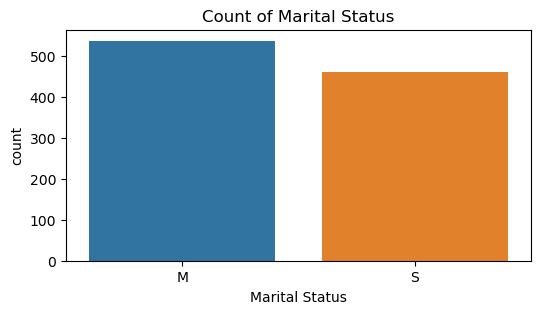

In [41]:
# barplot to show marital status count
plt.figure(figsize=(6, 3))
sns.countplot(data = data, x = 'Marital Status')
plt.title('Count of Marital Status')
plt.show()

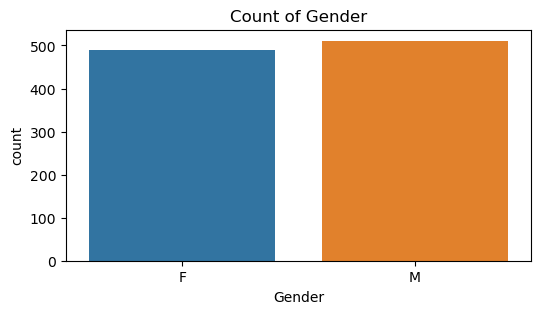

In [56]:
# barplot to show Gender count
plt.figure(figsize=(6, 3))
sns.countplot(data = data, x = 'Gender')
plt.title('Count of Gender')
plt.show()

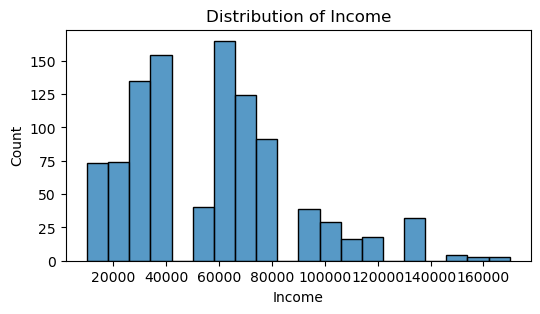

In [57]:
# Histogram Showing income distribution
plt.figure(figsize=(6, 3))
sns.histplot(data = data, x = 'Income')
plt.title('Distribution of Income')
plt.show()

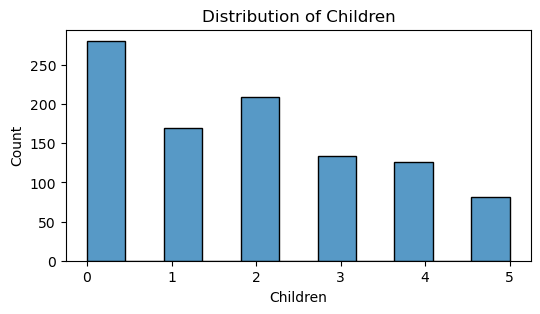

In [58]:
# Histogram showing number of children distribution
plt.figure(figsize=(6, 3))
sns.histplot(data = data, x = 'Children')
plt.title('Distribution of Children')
plt.show()

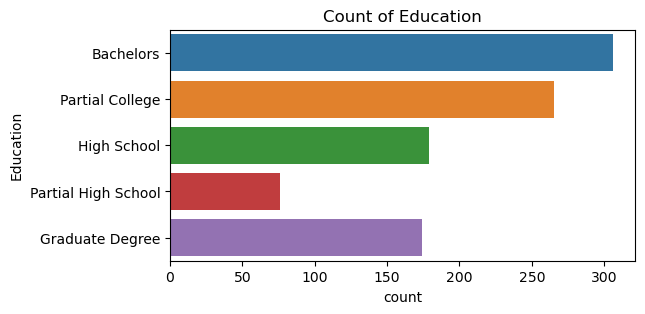

In [59]:
# barplot showing Education level count
plt.figure(figsize=(6, 3))
sns.countplot(data = data, y = 'Education')
plt.title('Count of Education')
plt.show()

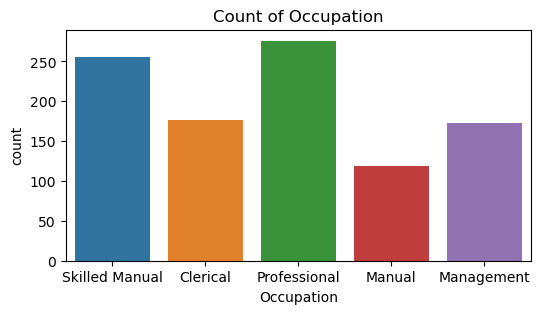

In [64]:
# barplot to show marital status count
plt.figure(figsize=(6, 3))
sns.countplot(data = data, x = 'Occupation')
plt.title('Count of Occupation')
plt.show()

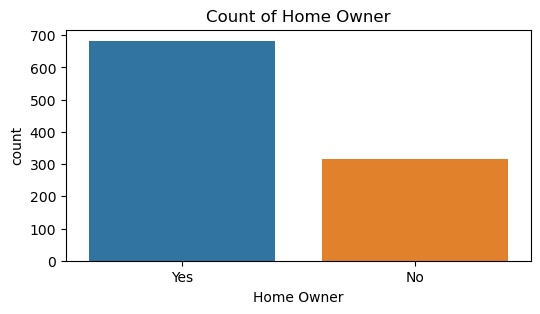

In [60]:
# barplot showing Home owner count
plt.figure(figsize=(6, 3))
sns.countplot(data = data, x = 'Home Owner')
plt.title('Count of Home Owner')
plt.show()

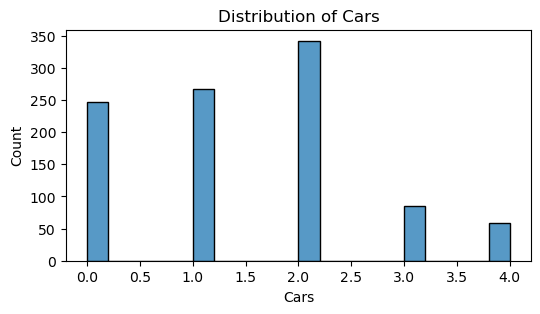

In [61]:
# Histogram showing number of cars distribution
plt.figure(figsize=(6, 3))
sns.histplot(data = data, x = 'Cars')
plt.title('Distribution of Cars')
plt.show()

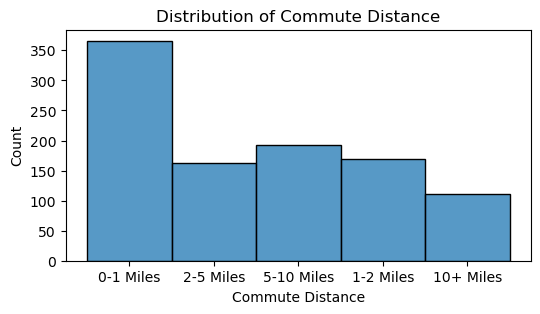

In [66]:
# Histogram showing distribution of commute distance
plt.figure(figsize=(6, 3))
sns.histplot(data = data, x = 'Commute Distance')
plt.title('Distribution of Commute Distance')
plt.show()

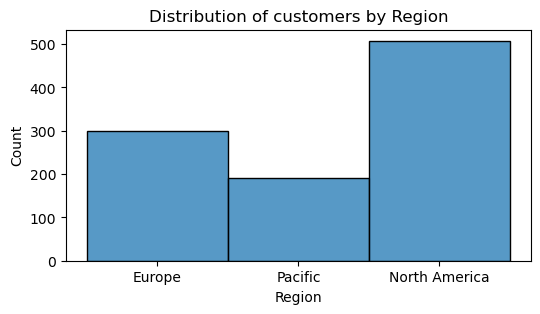

In [68]:
# Histogram showing distribution Of Region
plt.figure(figsize=(6, 3))
sns.histplot(data = data, x = 'Region')
plt.title('Distribution of customers by Region')
plt.show()

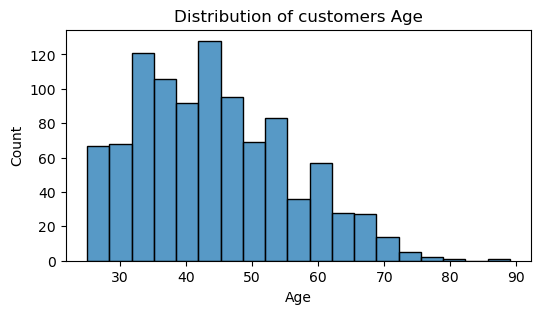

In [72]:
# Histogram showing Age distribution
plt.figure(figsize=(6, 3))
sns.histplot(data = data, x = 'Age')
plt.title('Distribution of customers Age')
plt.show()

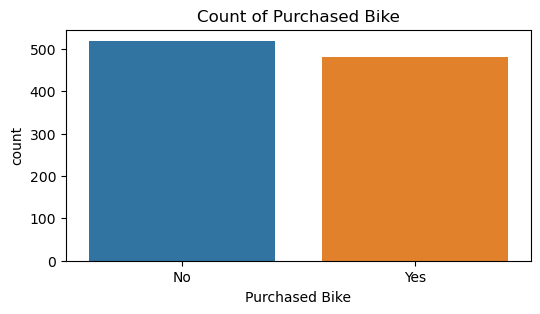

In [74]:
# barplot to showing Purchased Bike Count
plt.figure(figsize=(6, 3))
sns.countplot(data = data, x = 'Purchased Bike')
plt.title('Count of Purchased Bike')
plt.show()

## Data Analysis

In [76]:
# data stat
data.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [79]:
# checking the mean income by marital status
data.groupby("Marital Status")["Income"].mean()

Marital Status
M    58717.472119
S    53614.718615
Name: Income, dtype: float64

In [80]:
# checking the mean income by Gender
data.groupby("Gender")["Income"].mean()

Gender
F    54580.777096
M    58062.622309
Name: Income, dtype: float64

In [82]:
# checking the mean income by Education
data.groupby("Education")["Income"].mean()

Education
Bachelors              63006.535948
Graduate Degree        66091.954023
High School            47262.569832
Partial College        54716.981132
Partial High School    34473.684211
Name: Income, dtype: float64

In [83]:
# checking the mean income by Occupation
data.groupby("Occupation")["Income"].mean()

Occupation
Clerical          31073.446328
Management        86647.398844
Manual            16722.689076
Professional      75072.463768
Skilled Manual    51607.843137
Name: Income, dtype: float64

In [84]:
# checking the mean income by Commute Distance
data.groupby("Commute Distance")["Income"].mean()

Commute Distance
0-1 Miles     49562.841530
1-2 Miles     51893.491124
10+ Miles     74864.864865
2-5 Miles     60493.827160
5-10 Miles    59062.500000
Name: Income, dtype: float64

In [85]:
# checking the mean income by Region
data.groupby("Region")["Income"].mean()

Region
Europe           40900.000000
North America    62755.905512
Pacific          63593.750000
Name: Income, dtype: float64

## Data Preprocessing

In [88]:
# Converting categorical variables into numerical format
data['Marital Status'] = data['Marital Status'].apply(lambda x: 1 if x == 'M' else 0)

data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'F' else 0)

data['Education'] = data['Education'].map({'Partial High School': 0, 'High School': 1, 'Partial College': 2, 
                                           'Bachelors': 3, 'Graduate Degree': 4})

data['Occupation'] = data['Occupation'].map({'Manual': 0, 'Clerical': 1, 'Skilled Manual': 2, 
                                           'Professional': 3, 'Management': 4})

data['Home Owner'] = data['Home Owner'].apply(lambda x: 1 if x == 'Yes' else 0)

data['Commute Distance'] = data['Commute Distance'].map({'0-1 Miles': 0, '1-2 Miles': 1, '2-5 Miles': 2, 
                                           '5-10 Miles': 3, '10+ Miles': 4})

data['Region'] = data['Region'].map({'Europe': 0, 'North America': 1, 'Pacific': 2})

data['Purchased Bike'] = data['Purchased Bike'].apply(lambda x: 1 if x == 'Yes' else 0)

In [89]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,1,40000,1,3,2,1,0,0,0,42,0
1,24107,1,0,30000,3,2,1,1,1,0,0,43,0
2,14177,1,0,80000,5,2,3,0,2,2,0,60,0
3,24381,0,0,70000,0,3,3,1,1,3,2,41,1
4,25597,0,0,30000,0,3,1,0,0,0,0,36,1


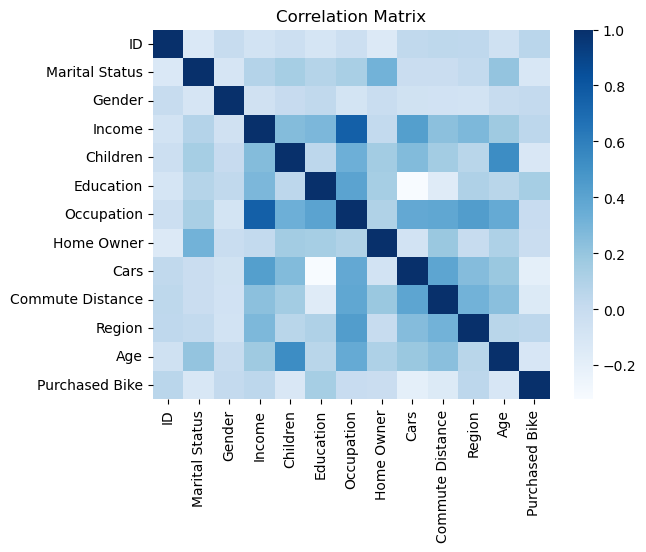

In [155]:
# visualizing correlation between data features
sns.heatmap(data.corr(), cmap = "Blues")
plt.title('Correlation Matrix')
plt.show()

# Building Models

## Logistic Regression

In [101]:
#importing model and model selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [103]:
#splitting the data into training and testing dataset
X = data.drop(["Purchased Bike", "ID"], axis=1) #training data
y = data["Purchased Bike"] #testing data

In [104]:
#data splicing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [105]:
#feature scaling
from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

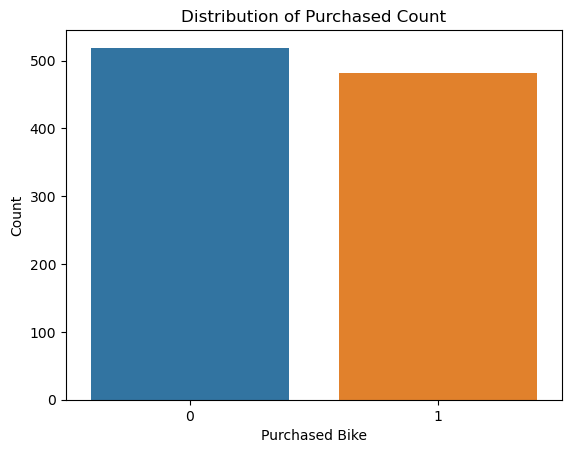

In [106]:
# Visualization of the distribution of the target variable
sns.countplot(x='Purchased Bike', data=data)
plt.xlabel('Purchased Bike')
plt.ylabel('Count')
plt.title('Distribution of Purchased Count')
plt.show()

In [108]:
# Instantiate a regression model and fitting the model
Classifier = LogisticRegression(random_state=0)
Classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [109]:
#predicting the test set result
y_pred = Classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], d

In [130]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[102,  52],
       [ 60,  86]], dtype=int64)

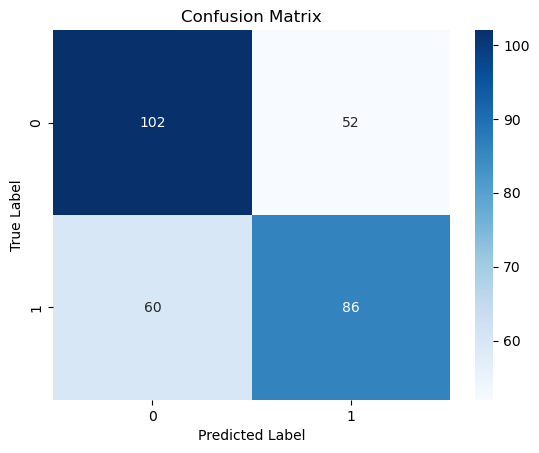

In [134]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       154
           1       0.62      0.59      0.61       146

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



In [156]:
# Finding model accuracy - using the confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

62.66666666666667

## Decision Tree

In [135]:
#importing the decision tree model and fitting model
from sklearn.tree import DecisionTreeClassifier

#function to perform training with entropy
Classifier_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
Classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [136]:
#making predictions
Y_pred_entropy = Classifier_entropy.predict(X_test)
Y_pred_entropy

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], d

In [137]:
confusion_matrix(y_test, Y_pred_entropy)

array([[77, 77],
       [58, 88]], dtype=int64)

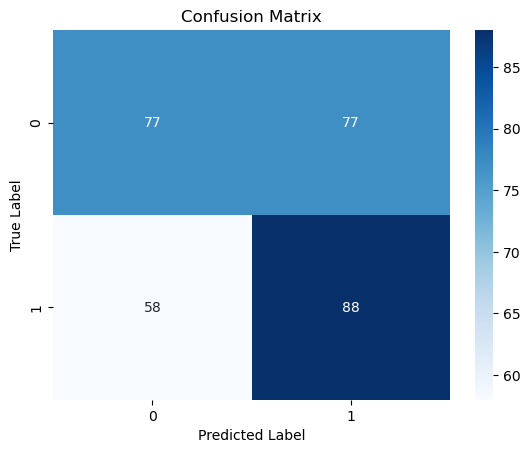

In [138]:
sns.heatmap(confusion_matrix(y_test, Y_pred_entropy), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [139]:
print(classification_report(y_test, Y_pred_entropy))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53       154
           1       0.53      0.60      0.57       146

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



In [157]:
#checking accuracy
accuracy_score(y_test, Y_pred_entropy) * 100

55.00000000000001

## Random Forest

In [141]:
# importing the model and fitting the data in the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
#predicting usinf the model
rfc_pred = rfc.predict(X_test)

In [143]:
confusion_matrix(y_test, rfc_pred)

array([[112,  42],
       [ 48,  98]], dtype=int64)

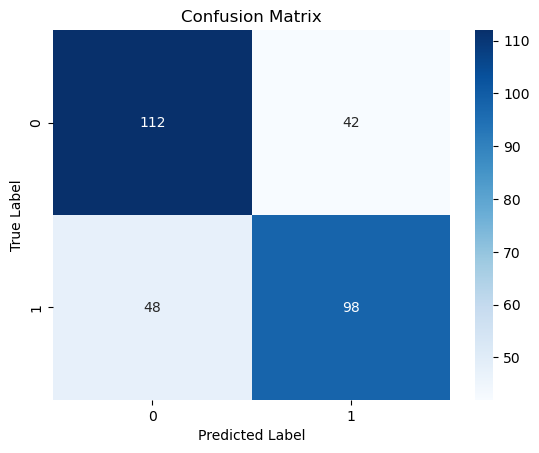

In [146]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [144]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       154
           1       0.70      0.67      0.69       146

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [158]:
accuracy_score(y_test, rfc_pred) * 100

70.0

## K Nearest Neighbour (KNN)

In [147]:
# fitting KNN to the training dataset
from sklearn.neighbors import KNeighborsClassifier
KNN_c = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_c.fit(X_train, y_train)

KNeighborsClassifier()

In [149]:
#predicting the test results
KNN_y_pred = KNN_c.predict(X_test)
KNN_y_pred

C:\Users\SamDutse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

In [150]:
confusion_matrix(y_test, KNN_y_pred)

array([[94, 60],
       [60, 86]], dtype=int64)

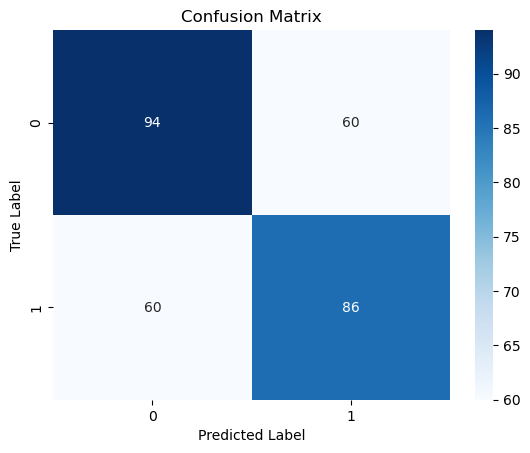

In [151]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test, KNN_y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [152]:
print(classification_report(y_test, KNN_y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       154
           1       0.59      0.59      0.59       146

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.60      0.60      0.60       300



In [154]:
accuracy_score(y_test, KNN_y_pred) * 100

60.0